In [1]:
import numpy as np
import pandas as pd

In [2]:
df=pd.read_csv('/content/placement.csv')

In [3]:
df.head()

,Unnamed: 0,cgpa,iq,placement
0,0,6.8,123.0,1
1,1,5.9,106.0,0
2,2,5.3,121.0,0
3,3,7.4,132.0,1
4,4,5.8,142.0,0


In [4]:
df.shape

(100, 4)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  100 non-null    int64  
 1   cgpa        100 non-null    float64
 2   iq          100 non-null    float64
 3   placement   100 non-null    int64  
dtypes: float64(2), int64(2)
memory usage: 3.2 KB


In [7]:
df=df.iloc[:,1:]

In [8]:
df

,cgpa,iq,placement
0,6.8,123.0,1
1,5.9,106.0,0
2,5.3,121.0,0
3,7.4,132.0,1
4,5.8,142.0,0
...,...,...,...
95,4.3,200.0,0
96,4.4,42.0,0
97,6.7,182.0,1
98,6.3,103.0,1


In [9]:
import matplotlib.pyplot as plt

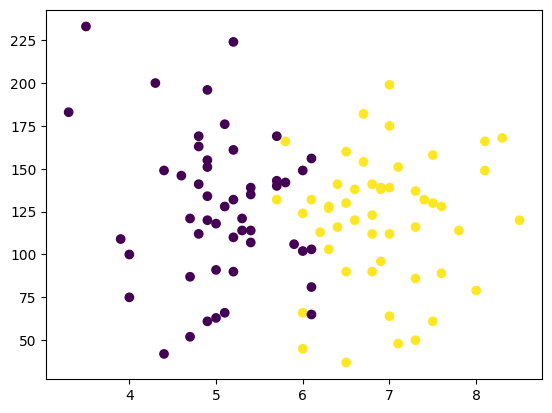

In [11]:
plt.scatter(df['cgpa'],df['iq'],c=df['placement'])

In [12]:
x=df.iloc[:,0:2]
y=df.iloc[:,-1]

In [13]:
x

,cgpa,iq
0,6.8,123.0
1,5.9,106.0
2,5.3,121.0
3,7.4,132.0
4,5.8,142.0
...,...,...
95,4.3,200.0
96,4.4,42.0
97,6.7,182.0
98,6.3,103.0


In [14]:
y

0     1
1     0
2     0
3     1
4     0
     ..
95    0
96    0
97    1
98    1
99    1
Name: placement, Length: 100, dtype: int64

In [16]:
from sklearn.model_selection import train_test_split

x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.1)

In [17]:
x_train

,cgpa,iq
67,5.0,118.0
9,5.1,66.0
50,3.5,233.0
72,7.3,116.0
59,4.8,112.0
...,...,...
13,6.4,116.0
54,6.4,141.0
88,4.4,149.0
25,5.0,91.0


In [18]:
y_train

67    0
9     0
50    0
72    1
59    0
     ..
13    1
54    1
88    0
25    0
58    1
Name: placement, Length: 90, dtype: int64

In [20]:
from sklearn.preprocessing import StandardScaler

In [21]:
scaler=StandardScaler()

In [22]:
x_train=scaler.fit_transform(x_train)

In [23]:
x_train

array([[-9.54786593e-01, -1.57737916e-01],
       [-8.63854536e-01, -1.50730546e+00],
       [-2.31876744e+00,  2.82688261e+00],
       [ 1.13665071e+00, -2.09644360e-01],
       [-1.13665071e+00, -3.13457248e-01],
       [-5.91058367e-01,  2.83466858e-01],
       [-1.22758276e+00, -7.98782499e-02],
       [-6.81990423e-01, -2.61550804e-01],
       [-1.13665071e+00,  1.16587640e+00],
       [ 5.91058367e-01,  7.76578075e-01],
       [-4.54660282e-02, -5.72989467e-01],
       [-9.54786593e-01, -1.58516512e+00],
       [-3.18262198e-01,  1.16587640e+00],
       [ 5.00126310e-01,  3.61326524e-01],
       [ 2.27330141e-01,  7.58410820e-02],
       [-1.13665071e+00,  4.39186190e-01],
       [-4.54660282e-02, -2.05232312e+00],
       [ 7.72922480e-01, -7.28708799e-01],
       [ 6.81990423e-01,  4.39186190e-01],
       [ 4.09194254e-01,  9.32297407e-01],
       [ 8.63854536e-01, -3.13457248e-01],
       [ 4.54660282e-02,  8.28484519e-01],
       [ 4.54660282e-02,  2.05607192e-01],
       [ 2.

In [24]:
x_test=scaler.transform(x_test)

In [25]:
x_test

array([[-1.95503921, -0.39131691],
       [ 0.04546603, -1.53325868],
       [-1.31851482,  0.5689523 ],
       [-0.77292248, -0.36536369],
       [-0.04546603, -1.50730546],
       [-1.59131099,  1.97042629],
       [ 2.22783538, -0.10583147],
       [-1.04571865,  0.69871841],
       [-1.50037893, -2.13018279],
       [ 0.59105837,  1.50326829]])

In [26]:
from sklearn.linear_model import LogisticRegression

In [27]:
clf=LogisticRegression()

In [28]:
clf.fit(x_train,y_train)

LogisticRegression()

In [31]:
y_pred=clf.predict(x_test)

In [30]:
y_test

31    0
56    0
39    0
92    0
45    1
95    0
69    1
89    0
96    0
97    1
Name: placement, dtype: int64

In [32]:
from sklearn.metrics import accuracy_score

In [33]:
accuracy_score(y_test,y_pred)

0.9

In [34]:
from mlxtend.plotting import plot_decision_regions

<Axes: >

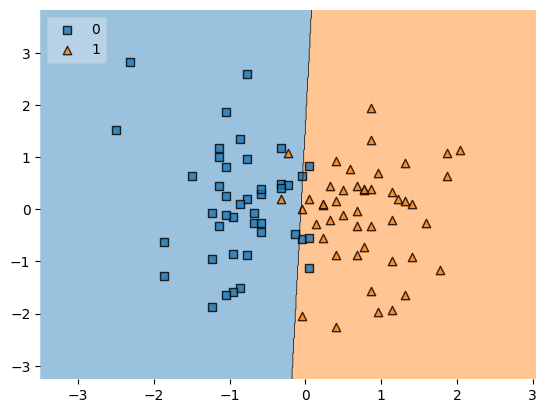

In [35]:
plot_decision_regions(x_train,y_train.values,clf=clf,legend=2)